In [ ]:
!jupyter nbconvert --to html /content/Assignment1.ipynb

[NbConvertApp] Converting notebook /content/Assignment1.ipynb to html
[NbConvertApp] Writing 1077529 bytes to /content/Assignment1.html


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import os
#!unzip archive.zip
#!unzip non-faces.zip

##**Generate Data Matrix**

In [ ]:
number_of_persons = 40

this function reads a pgm file and return it in the form of a matrix

In [ ]:
def read_single_image(image_path):
    img = []
    with open(image_path, 'rb') as f:
        assert f.readline() == b'P5\n'
        assert f.readline() == b'92 112\n'
        assert f.readline() == b'255\n'

        for i in range(10304):
            img.append(ord(f.read(1)))
    return img

the genenrate_data_matrix function reads images from path and constructs data and label matrics

In [ ]:
def generate_data_matrix():

    images = []
    persons = []

    path = '/content/'

    for x in range(1, number_of_persons + 1):
        current_person_path = path + 's' + str(x) + '/'
        for y in range(1, 11):
            persons.append(str(x)) #label
            images.append(read_single_image(current_person_path + str(y) + '.pgm')) #data

    print("Number of Images : "+str(len(images)))
    images = np.array(images)

    return images, persons

(D, y) = generate_data_matrix()
# Data Matrix : D
# Label vector : y

Number of Images : 400


##**Train-Test Split**

In [ ]:
def train_test_split(data, labels, no_of_samples, train_indices):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for i in range(no_of_samples):
        if i%10 in train_indices:
            X_train.append(data[i])
            y_train.append(labels[i])
        else:
            X_test.append(data[i])
            y_test.append(labels[i])
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(D, y, len(D), [0, 2, 4, 6, 8])
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

200
200
200
200


##**K-NN Classifier**

this function uses KNeighborsClassifier from sklearn library to predict the labels of test data and then compares it to the real label to calculate and return the accuracy of the model

In [ ]:
def classify(X_train, y_train, X_test, y_test, n_neighbors, confusion_matrix_allowed=False):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train, y_train)
    test_samples = len(X_test)
    acc = 0
    y_predict = []

    for i in range(test_samples):
        result = classifier.predict([X_test[i]])
        y_predict.append(result)
        if result == y_test[i]:
            acc += 1

    acc /= test_samples
    print(f'Acc at K = {n_neighbors}: {acc*100} %')

    if confusion_matrix_allowed:
        conf_matrix = confusion_matrix(y_test, y_predict)
        return conf_matrix, acc

    return acc

##**PCA**

This function returns the number of eigen values needed to make the explained variance equal to the alpha

In [ ]:
def calculate_required_eigens_helper(alpha, eigen_values):
    sum = np.sum(eigen_values)
    v = 0
    i = 0
    for value in eigen_values:
        v = v + eigen_values[i]
        i = i + 1
        if (v / sum >= alpha):
            break
    return i

This function uses the helper function to calculate the number of needed eigen vector for each alpha and returns it

In [ ]:
def calculate_required_eigens(alpha_values, eigen_values):
    required_eigens = []
    for alpha in alpha_values:
        required_eigens.append(calculate_required_eigens_helper(alpha, eigen_values))
    return required_eigens

This is the main PCA function that calculates the covariance matrix and calls the above function to return the eigen vectors needed for the projection matrix

In [ ]:
def PCA(X_train, alpha):
  mean = np.mean(X_train,0)
  #print(mean)
  Z= X_train - mean
  cov = np.matmul(np.transpose(Z), Z) / len(X_train)
  #print(cov_pca)
  eigen_values, eig_vectors = np.linalg.eigh(cov)
  index = eigen_values.argsort()[::-1]
  eigen_values = eigen_values[index]
  eigen_vectors = eig_vectors[:,index]
  print(index)
  v = calculate_required_eigens(alpha, eigen_values) # number of needed eigen vectors
  return v,eigen_vectors

In [ ]:
v, eigen_vectors = PCA(X_train, [0.8, 0.85, 0.9, 0.95])

[10303 10302 10301 ...     2     1     0]


looping over the alphas (no of eigen vectors) and projecting and classifing

Acc at K = 1: 95.0 %
Acc at K = 3: 90.0 %
Acc at K = 5: 87.0 %
Acc at K = 7: 80.5 %


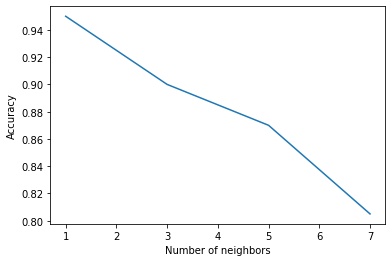



Acc at K = 1: 95.0 %
Acc at K = 3: 90.5 %
Acc at K = 5: 85.5 %
Acc at K = 7: 77.5 %


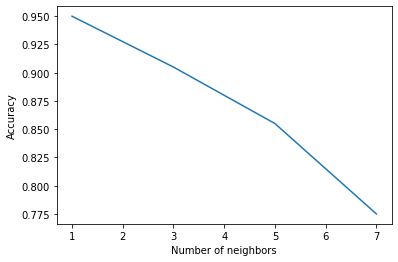



Acc at K = 1: 94.0 %
Acc at K = 3: 90.0 %
Acc at K = 5: 84.5 %
Acc at K = 7: 78.0 %


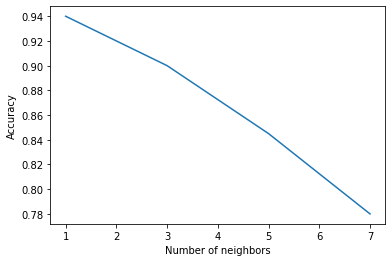



Acc at K = 1: 94.0 %
Acc at K = 3: 90.5 %
Acc at K = 5: 84.5 %
Acc at K = 7: 76.0 %


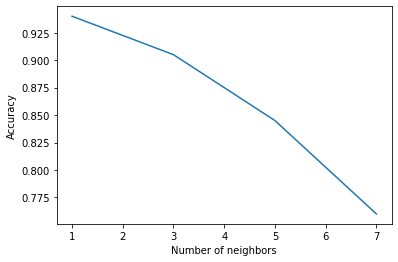

In [ ]:
for i in v:
    U = eigen_vectors[:,0:i].T
    projected_train_data = np.array(np.matmul(X_train, U.T))
    projected_test_data = np.array(np.matmul(X_test, U.T))
    k_values = [1,3,5,7]
    acc = []
    for k in k_values:
      acc.append(classify(projected_train_data,y_train,projected_test_data,y_test,k))
    plt.plot(k_values,acc)
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.show()
    print("\n")

K and Accuracy are inversly proportional

##**PCA Bonus**

[36, 51, 76, 115]
Acc at K = 1: 86.5 %
Acc at K = 3: 76.0 %
Acc at K = 5: 70.5 %
Acc at K = 7: 64.5 %


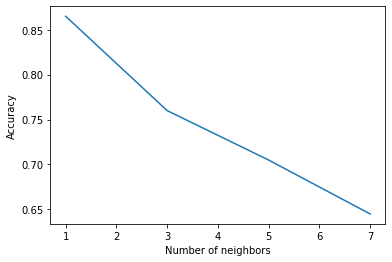



Acc at K = 1: 90.0 %
Acc at K = 3: 78.5 %
Acc at K = 5: 70.0 %
Acc at K = 7: 63.5 %


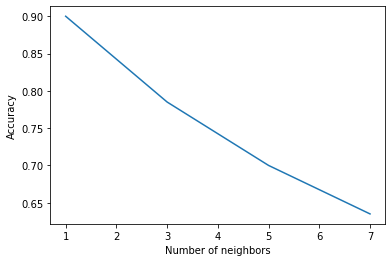



Acc at K = 1: 92.0 %
Acc at K = 3: 82.5 %
Acc at K = 5: 75.5 %
Acc at K = 7: 68.5 %


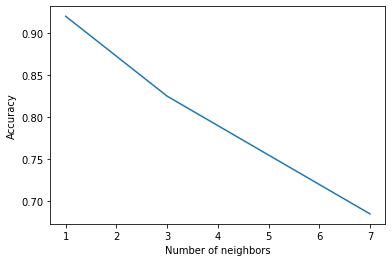



Acc at K = 1: 94.0 %
Acc at K = 3: 90.5 %
Acc at K = 5: 84.5 %
Acc at K = 7: 76.0 %


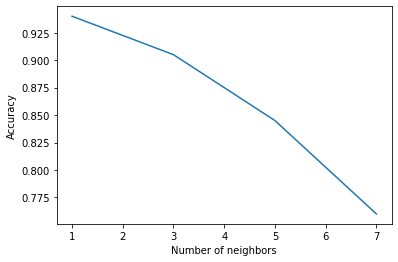

In [ ]:
from sklearn.decomposition import IncrementalPCA

for i in v:
  # create an instance of IncrementalPCA
  incremental_pca = IncrementalPCA(n_components = i)
  # specify the number of batches
  no_of_increments = int(200/i)
# fit the data in increments
  for increment in np.array_split(X_train, no_of_increments):
    incremental_pca.fit(increment)
  # fit and transform the data
  projected_train_data = incremental_pca.transform(X_train)
  projected_test_data = incremental_pca.transform(X_test)
  k_values = [1,3,5,7]
  acc = []
  for k in k_values:
    acc.append(classify(projected_train_data,y_train,projected_test_data,y_test,k))
  plt.plot(k_values,acc)
  plt.xlabel('Number of neighbors')
  plt.ylabel('Accuracy')
  plt.show()
  print("\n")

##**LDA**

This part consists of 4 section that will perform our LDA classification:

The first part contains a function called LDA_eigens that takes two input parametares: X_train which is the training data set and y_train which is the labels of the data and return the eigen vectors and the eigen values for those data.
Here is the code for the function:


In [ ]:
def LDA_eigens(X_train,y_train):
  mean = []
  X_train = np.array(X_train)
  # nk is the number of samples in each class
  nk = 5
  for i in range(40):
    start = i*nk
    end = i*nk + nk
    mean.append(np.mean(X_train[start:end,:],axis=0))
  mean = np.array(mean)
  mean_all = np.mean(X_train,axis=0)
  mean_all = mean_all.reshape(1,10304)
  Sb = nk*(mean-mean_all).T@(mean-mean_all)
  S = np.zeros((10304,10304))
  y_train = np.array(y_train)
  for i in range(40):
    start = i*nk
    end = i*nk + nk
    Z = X_train[start:end,:]-mean[i]
    Z = Z.T @ Z
    S += Z
  u,v = np.linalg.eigh(np.linalg.inv(S)@Sb)
  return u,v

The second section is a function called LDA_data_projection that takes the eigen vectors and the eigen values and returns the projected data for both the train set and the test set. Here is the code for this function:


In [ ]:
def LDA_data_projection(u,v,X_train,X_test,i):
  idx = u.argsort()[::-1]
  ordered_v = v[:, idx]
  dominant_eigen_vectors = ordered_v[:,:i]
  training_data_projection = X_train @ dominant_eigen_vectors
  test_data_projection = X_test @ dominant_eigen_vectors
  return training_data_projection,test_data_projection

The third part uses the previous two functions to calculate the accuracy of the model using the first neighbor classifier.
Here is the code for this part:


In [ ]:
u,v = LDA_eigens(X_train,y_train)
training_data_projection,test_data_projection = LDA_data_projection(u,v,X_train,X_test,39)
classifier = KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
classifier.fit(training_data_projection,y_train)
y_predict = classifier.predict(test_data_projection)
print("Accuracy = ",(np.count_nonzero(y_predict == y_test)/200)*100)

Accuracy =  95.0


The last part test the accuracy using different neighor values.
Here is the code:


Acc at K = 1: 95.0 %
Acc at K = 3: 86.5 %
Acc at K = 5: 81.5 %
Acc at K = 7: 77.0 %


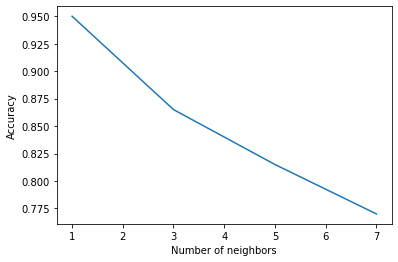

In [ ]:
k_values = [1,3,5,7]
acc = []
for k in k_values:
  acc.append(classify(training_data_projection,y_train,test_data_projection,y_test,k))
plt.plot(k_values,acc)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

##**Compare vs Non-Face Images**

In [ ]:
pip install randimage

In [ ]:
def display_confusion_matrix(conf_matrix):
    sns.heatmap(matrix,annot=True,fmt='g')
    plt.show()

this part is responsible of generating non-face pgm images

In [ ]:
from randimage import get_random_image, show_array
from PIL import Image
import matplotlib

image_size = (112,92)

for i in range(1,501):
    image = get_random_image(image_size)
    inpath = "random/randimg" + '{}.png'.format(i)
    matplotlib.image.imsave(inpath,image)
    outpath = 'random_pgm/'
    im = Image.open(inpath)
    im = im.resize((92,112)).convert("L")
    im.save(outpath + 'n{}.pgm'.format(i))

the generate_non_face_matrix has an argument (n) where n is the number of non-face images required and it generates a non-face images matrix of n images

In [ ]:
def generate_non_face_matrix(n):

    images = []
    labels = []

    path = 'random_pgm/'

    for x in range(1, n+1):
        images.append(read_single_image(path + 'n' +str(x) + '.pgm')) #data
        labels.append(str(41)) #label

    print("Number of Images : "+str(len(images)))
    images = np.array(images)

    return images, labels

In [ ]:
alpha_accuracies = [[] for i in range(4)]

### **100 Non-Face Images**

In [ ]:
(D_non, y_non) = generate_non_face_matrix(100)
# Non-Face Data Matrix : D_non
# Non-Face Label vector : y_non

Number of Images : 100


In [ ]:
faces_and_nonfaces_data = np.concatenate((D,D_non),axis=0)
faces_and_nonfaces_labels = ['1']*len(D)+ ['2']*len(D_non) # 1 : face  || 2 : non-face
print(len(faces_and_nonfaces_data))
print(len(faces_and_nonfaces_labels))

500
500


In [ ]:
X_train2, y_train2, X_test2, y_test2 = train_test_split(faces_and_nonfaces_data, faces_and_nonfaces_labels, len(faces_and_nonfaces_data), [0, 2, 4, 6, 8])

In [ ]:
alpha_values = [0.8, 0.85, 0.9, 0.95]
v2,eigen_vectors2 = PCA(X_train2 , alpha_values)

[10303 10302 10301 ...     2     1     0]


Acc at K = 1: 95.6 %


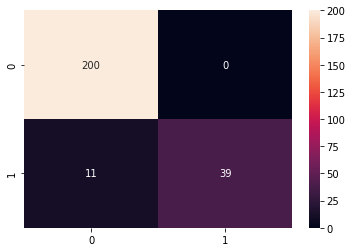

Acc at K = 1: 95.6 %


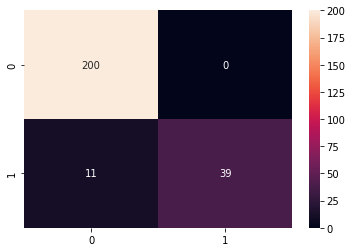

Acc at K = 1: 93.60000000000001 %


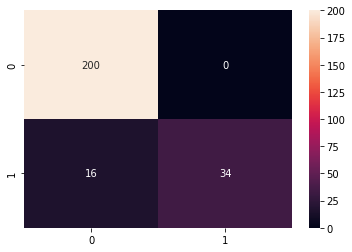

Acc at K = 1: 93.60000000000001 %


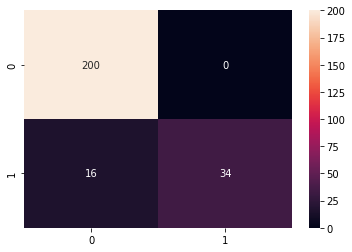

In [ ]:
c=0
for i in v2:
    U2 = eigen_vectors2[:,0:i].T
    projected_train_data2 = np.array(np.matmul(X_train2, U2.T))
    projected_test_data2 = np.array(np.matmul(X_test2, U2.T))
    matrix,acc = classify(projected_train_data2,y_train2,projected_test_data2,y_test2,1,True)
    alpha_accuracies[c].append(acc)
    c+=1
    display_confusion_matrix(matrix)

### **300 Non-Face Images**

In [ ]:
(D_non_300, y_non_300) = generate_non_face_matrix(300)
# Non-Face Data Matrix : D_non_300
# Non-Face Label vector : y_non_300

Number of Images : 300


In [ ]:
faces_and_nonfaces300_data = np.concatenate((D,D_non_300),axis=0)
faces_and_nonfaces300_labels = ['1']*len(D)+ ['2']*len(D_non_300) # 1 : face  || 2 : non-face
print(len(faces_and_nonfaces300_data))
print(len(faces_and_nonfaces300_labels))

700
700


In [ ]:
X_train300, y_train300, X_test300, y_test300 = train_test_split(faces_and_nonfaces300_data, faces_and_nonfaces300_labels, len(faces_and_nonfaces300_data), [0, 2, 4, 6, 8])

In [ ]:
alpha_values = [0.8, 0.85, 0.9, 0.95]
v300, eigen_vectors300 = PCA(X_train300, alpha_values)

[10303 10302 10301 ...     2     1     0]


Acc at K = 1: 96.28571428571429 %


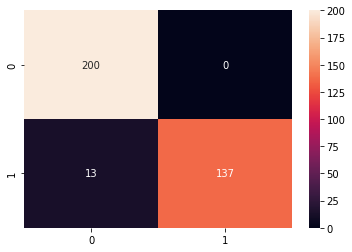

Acc at K = 1: 96.0 %


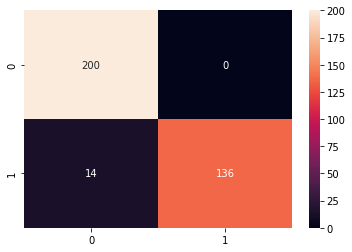

Acc at K = 1: 95.71428571428572 %


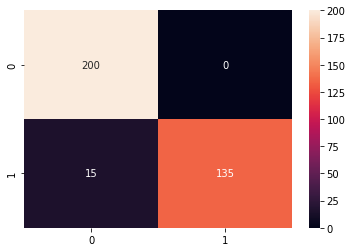

Acc at K = 1: 94.57142857142857 %


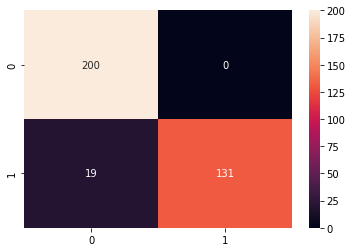

In [ ]:
c=0
for i in v300:
    U300 = eigen_vectors300[:,0:i].T
    projected_train_data300 = np.array(np.matmul(X_train300, U300.T))
    projected_test_data300 = np.array(np.matmul(X_test300, U300.T))
    matrix,acc = classify(projected_train_data300,y_train300,projected_test_data300,y_test300,1,True)
    alpha_accuracies[c].append(acc)
    c+=1
    display_confusion_matrix(matrix)

###**500 Non-Face Images**

In [ ]:
(D_non_500, y_non_500) = generate_non_face_matrix(500)
# Non-Face Data Matrix : D_non_500
# Non-Face Label vector : y_non_500

Number of Images : 500


In [ ]:
faces_and_nonfaces500_data = np.concatenate((D,D_non_500),axis=0)
faces_and_nonfaces500_labels = ['1']*len(D)+ ['2']*len(D_non_500) # 1 : face  || 2 : non-face
print(len(faces_and_nonfaces500_data))
print(len(faces_and_nonfaces500_labels))

900
900


In [ ]:
X_train500, y_train500, X_test500, y_test500 = train_test_split(faces_and_nonfaces500_data, faces_and_nonfaces500_labels, len(faces_and_nonfaces500_data), [0, 2, 4, 6, 8])

In [ ]:
alpha_values = [0.8, 0.85, 0.9, 0.95]
v500, eigen_vectors500 = PCA(X_train500, alpha_values)

[10303 10302 10301 ...     2     1     0]


Acc at K = 1: 97.77777777777777 %


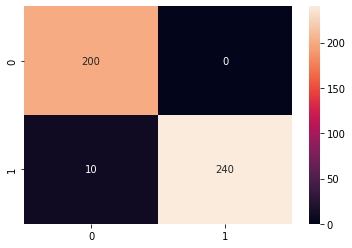

Acc at K = 1: 97.77777777777777 %


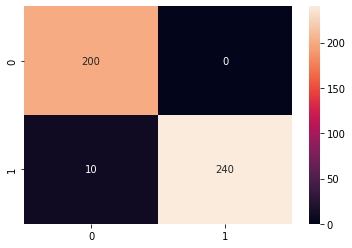

Acc at K = 1: 97.33333333333334 %


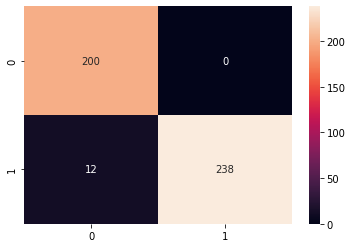

Acc at K = 1: 96.66666666666667 %


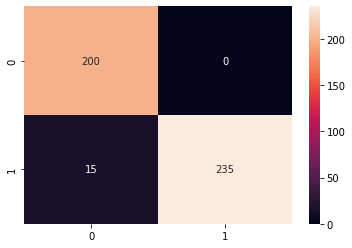

In [ ]:
c=0
for i in v500:
    U500 = eigen_vectors500[:,0:i].T
    projected_train_data500 = np.array(np.matmul(X_train500, U500.T))
    projected_test_data500 = np.array(np.matmul(X_test500, U500.T))
    matrix,acc = classify(projected_train_data500,y_train500,projected_test_data500,y_test500,1,True)
    alpha_accuracies[c].append(acc)
    c+=1
    display_confusion_matrix(matrix)

###**Non-Faces size vs Accuracy with different Alpha**

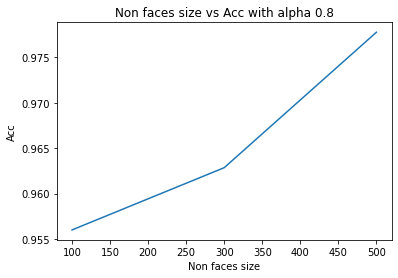

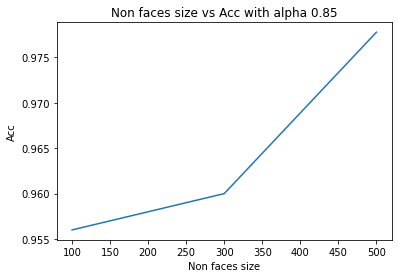

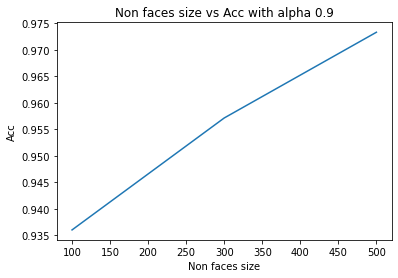

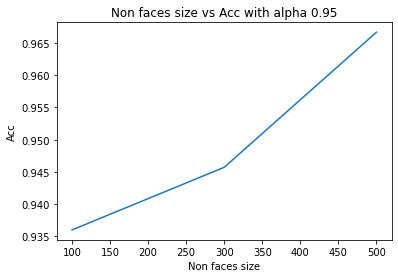

In [ ]:
alpha_values = [0.8, 0.85, 0.9, 0.95]
for i in range(len(alpha_accuracies)):
    plt.plot([100,300,500], alpha_accuracies[i])
    plt.xlabel('Non faces size')
    plt.ylabel('Acc')
    plt.title('Non faces size vs Acc with alpha {}'.format(alpha_values[i]))
    plt.show()
    print("\n")

Non-faces size and Accuracy are directly proportional

### **LDA for non-faces**

This part checks how many dominant eigen vectors needed to be able to use LDA classification model efficiently to differentiate between faces and non-faces pictures.

It is divided into two section.The first part get the data and then calculate the eigen vectors and the eigen values for it. I used 100 non-faces and 400 faces combination.

Here is the code:

In [ ]:
(D_non, y_non) = generate_non_face_matrix(100)
faces_and_nonfaces_data = np.concatenate((D,D_non),axis=0)
faces_and_nonfaces_labels = ['1']*len(D)+ ['2']*len(D_non) # 1 : face  || 2 : non-face
print(len(faces_and_nonfaces_data))
print(len(faces_and_nonfaces_labels))
X_train_non_faces, y_train_non_faces, X_test_non_faces, y_test_non_faces = train_test_split(faces_and_nonfaces_data, faces_and_nonfaces_labels, len(faces_and_nonfaces_data), [0, 2, 4, 6, 8])
u,v = LDA_eigens(X_train_non_faces,y_train_non_faces)

The second part test different dominant eigen vectors number and then get the accuracy of the every addition in the amount of it.


Acc at K = 3: 76.0 %
Acc at K = 3: 84.0 %
Acc at K = 3: 86.4 %
Acc at K = 3: 88.4 %
Acc at K = 3: 86.4 %
Acc at K = 3: 86.4 %
Acc at K = 3: 91.2 %
Acc at K = 3: 93.2 %
Acc at K = 3: 94.0 %
Acc at K = 3: 96.0 %
Acc at K = 3: 96.8 %
Acc at K = 3: 96.8 %
Acc at K = 3: 97.2 %
Acc at K = 3: 97.2 %
Acc at K = 3: 97.2 %
Acc at K = 3: 96.8 %
Acc at K = 3: 96.8 %
Acc at K = 3: 97.2 %
Acc at K = 3: 97.2 %
Acc at K = 3: 97.2 %


Text(0.5, 1.0, 'Accuracy of Classifacation')

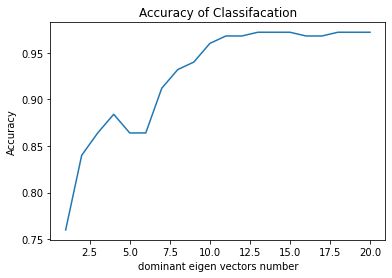

In [ ]:
acc = []
for i in range(1,21):
  non_faces_training_data_projection,non_faces_test_data_projection =  LDA_data_projection(u,v,X_train_non_faces,X_test_non_faces,i)
  acc.append(classify(non_faces_training_data_projection,y_train_non_faces,non_faces_test_data_projection,y_test_non_faces,3))
dominant_eigen_vectors_range = list(range(1,21))
plt.plot(dominant_eigen_vectors_range,acc)
plt.xlabel("dominant eigen vectors number")
plt.ylabel("Accuracy")
plt.title("Accuracy of Classifacation")

I think the first 15 eigen vectors will give a reasonable results for this model.



##**70-30 Train-Test Split**

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(D, y, len(D), [0, 1 , 2 , 3 , 4 , 5 , 6])

120


In [ ]:
v, eigen_vectors = PCA(X_train, [0.8, 0.85, 0.9, 0.95])

[10303 10302 10301 ...     2     1     0]


Acc at K = 1: 95.83333333333334 %
Acc at K = 3: 92.5 %
Acc at K = 5: 90.83333333333333 %
Acc at K = 7: 85.0 %


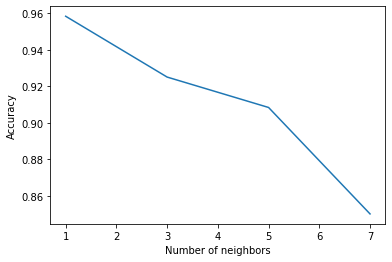



Acc at K = 1: 96.66666666666667 %
Acc at K = 3: 93.33333333333333 %
Acc at K = 5: 90.83333333333333 %
Acc at K = 7: 85.83333333333333 %


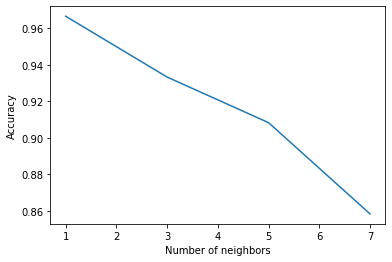



Acc at K = 1: 96.66666666666667 %
Acc at K = 3: 92.5 %
Acc at K = 5: 90.0 %
Acc at K = 7: 85.0 %


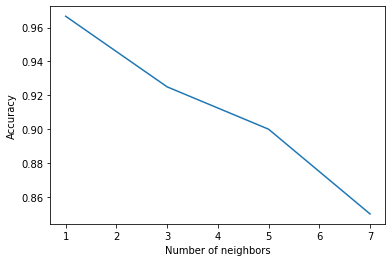



Acc at K = 1: 95.0 %
Acc at K = 3: 93.33333333333333 %
Acc at K = 5: 90.83333333333333 %
Acc at K = 7: 80.83333333333333 %


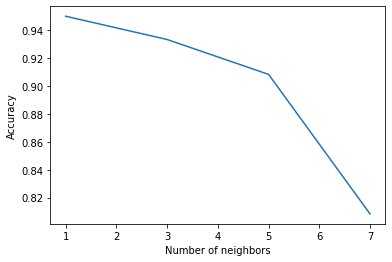

In [ ]:
for i in v:
    U = eigen_vectors[:,0:i].T
    projected_train_data = np.array(np.matmul(X_train, U.T))
    projected_test_data = np.array(np.matmul(X_test, U.T))
    k_values = [1,3,5,7]
    acc = []
    for k in k_values:
      acc.append(classify(projected_train_data,y_train,projected_test_data,y_test,k))
    plt.plot(k_values,acc)
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.show()
    print("\n")

The Accuracy has increased compared to the 50-50 Train-Test Split